Проведем исследовательский анализ данных частот (и шума) временного ряда

![Частотный анализ](1_05.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://video.ittensive.com/time-series/ittensive.time.series.01.csv", decimal=',')
data = data[::-1].reset_index()
data.head()

,index,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,150,Нояб. '09,108.25,104.75,114.13,104.10,-,"3,34%"
1,149,Дек. '09,108.40,108.25,110.25,105.75,-,"0,14%"
2,148,Янв. '10,96.78,108.40,111.53,96.10,-,"-10,72%"
3,147,Февр. '10,97.13,97.03,101.13,91.43,-,"0,36%"
4,146,Март '10,98.88,97.13,100.38,91.78,-,"1,80%"


Рассчитаем основные параметры "распределения" значений ряда

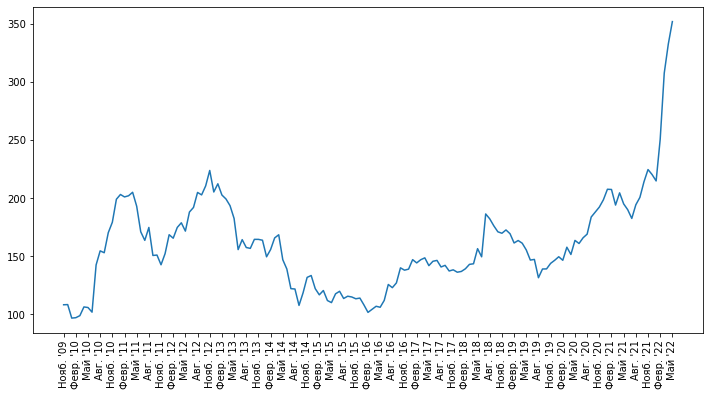

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data["Дата"].values,data["Цена"].values)
plt.xticks(data.index[::3], data["Дата"].values[::3], rotation=90)
plt.show()

In [4]:
data["Цена"].describe()

count    151.000000
mean     160.161258
std       41.119834
min       96.780000
25%      137.100000
50%      155.400000
75%      183.100000
max      351.800000
Name: Цена, dtype: float64

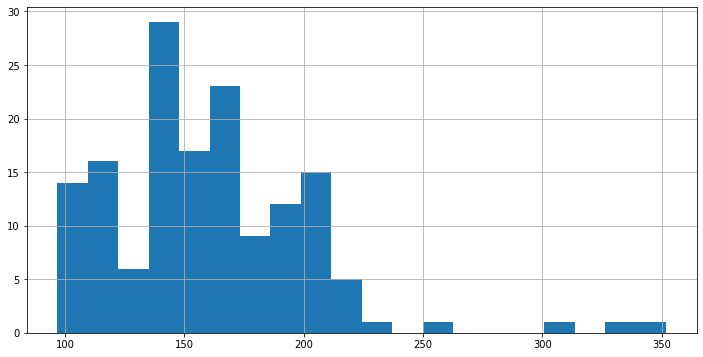

In [5]:
plt.figure(figsize=(12, 6))
data["Цена"].hist(bins=20)
plt.show()

Оценим характер остатков от бегущего среднего

In [6]:
data["Цена6"] = data["Цена"].rolling(6).mean()
data["Цена6ост"] = data["Цена"]-data["Цена6"]

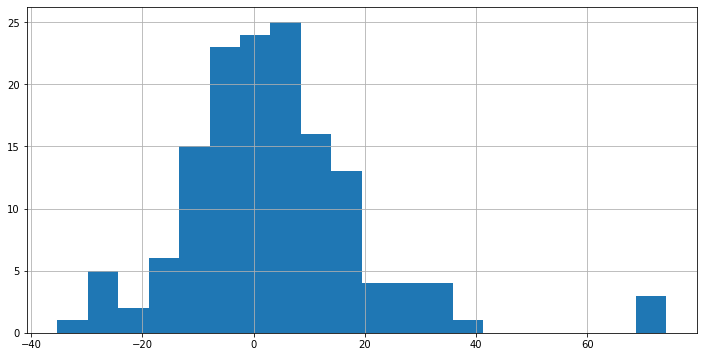

In [15]:
plt.figure(figsize=(12, 6))
data["Цена6ост"].hist(bins=20)
plt.show()

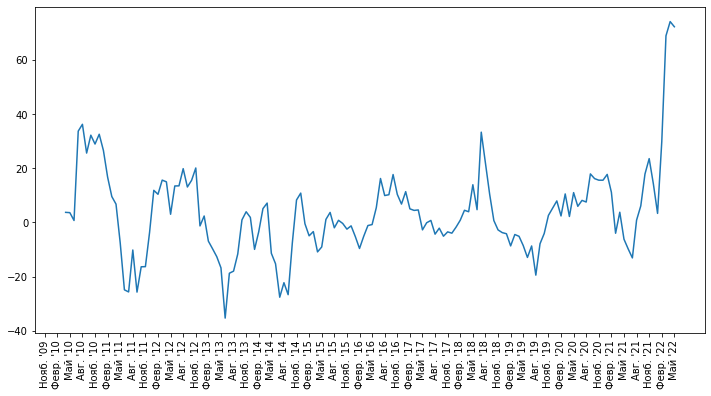

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(data["Дата"].values,data["Цена6ост"].values)
plt.xticks(data.index[::3], data["Дата"].values[::3], rotation=90)
plt.show()

"Красный" шум ошибок

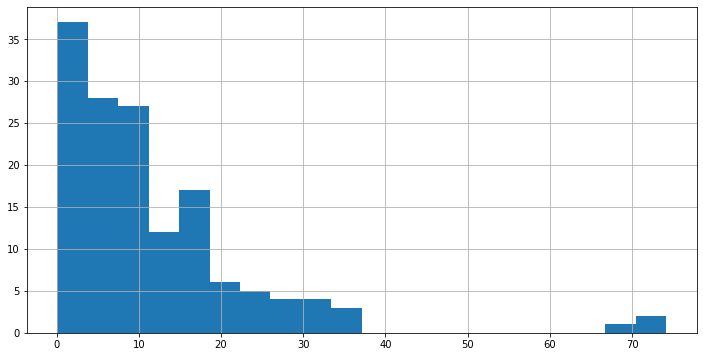

In [18]:
plt.figure(figsize=(12, 6))
np.abs(data["Цена6ост"]).hist(bins=20)
plt.show()

![Красный шум](1_06.png)